In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Feature selection: Select the columns that you want to use as features
# This is just an example, you might want to include more columns
feature_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MonthlyCharges']
target_column = 'Churn'

In [7]:
# Preprocessing: Convert categorical columns to numerical values
# This is a basic example; you may want to perform more sophisticated preprocessing
for column in feature_columns:
    if train_data[column].dtype == 'object':
        train_data[column] = pd.Categorical(train_data[column]).codes

# Convert the target column to numerical as well
train_data[target_column] = pd.Categorical(train_data[target_column]).codes

# Split the dataset into training and test sets
X = train_data[feature_columns]
y = train_data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Train a Logistic Regression model
clf = LogisticRegression(class_weight = 'balanced')
clf.fit(X_train_scaled, y_train)

# Evaluate the model
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

print("Classification report for training set:")
print(classification_report(y_train, y_train_pred))

print("Classification report for test set:")
print(classification_report(y_test, y_test_pred))

Classification report for training set:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      3104
           1       0.49      0.74      0.59      1121

    accuracy                           0.73      4225
   macro avg       0.69      0.73      0.70      4225
weighted avg       0.78      0.73      0.74      4225

Classification report for test set:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       776
           1       0.51      0.79      0.62       281

    accuracy                           0.74      1057
   macro avg       0.71      0.76      0.71      1057
weighted avg       0.80      0.74      0.76      1057



In [5]:
# Load the active_customers dataset
active_customers = pd.read_csv('active_customers.csv')

# Preprocess the active_customers dataset similar to how the train dataset was processed
for column in feature_columns:
    if active_customers[column].dtype == 'object':
        active_customers[column] = pd.Categorical(active_customers[column]).codes

# Standardize the features
active_customers_scaled = scaler.transform(active_customers[feature_columns])

# Make predictions for active customers
active_customers_predictions = clf.predict(active_customers_scaled)

# Export the predictions to a new CSV file
active_customers['PredictedChurn'] = active_customers_predictions
active_customers.to_csv('active_customers_with_predictions.csv', index=False)

First few records:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  3704-IEAXF  Female              0     Yes        Yes      72           No   
1  5175-AOBHI  Female              0      No         No       4          Yes   
2  6922-NCEDI    Male              0      No        Yes      56          Yes   
3  3143-ILDAL    Male              0      No         No      56          Yes   
4  0872-NXJYS  Female              0      No         No       9          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service             DSL                   No  ...   
1                No             DSL                   No  ...   
2                No              No  No internet service  ...   
3               Yes     Fiber optic                   No  ...   
4                No     Fiber optic                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                  Y

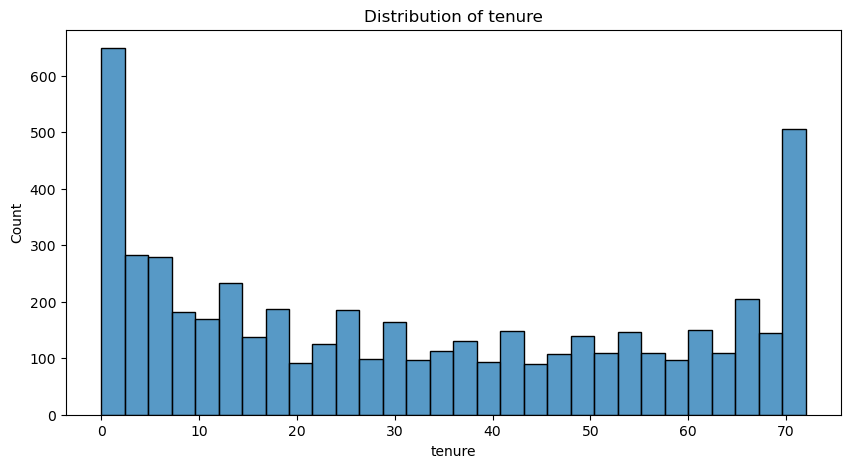

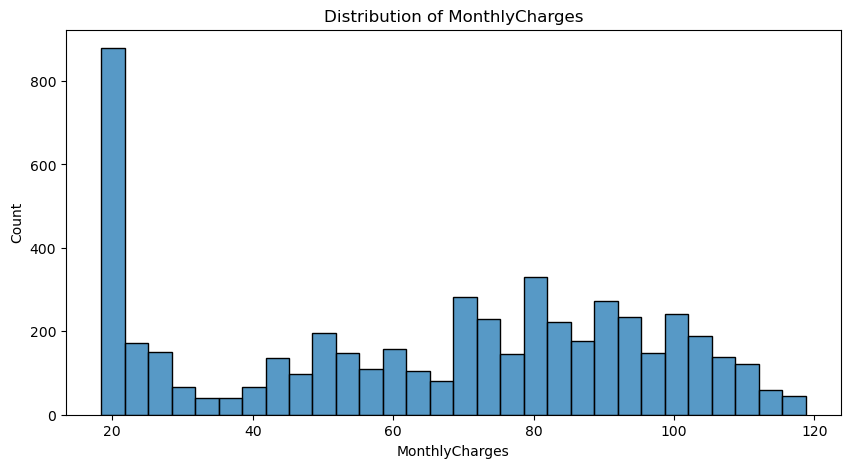

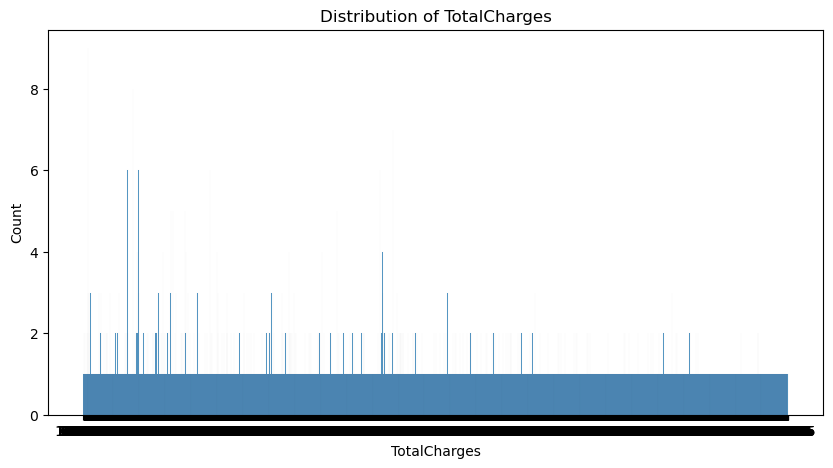

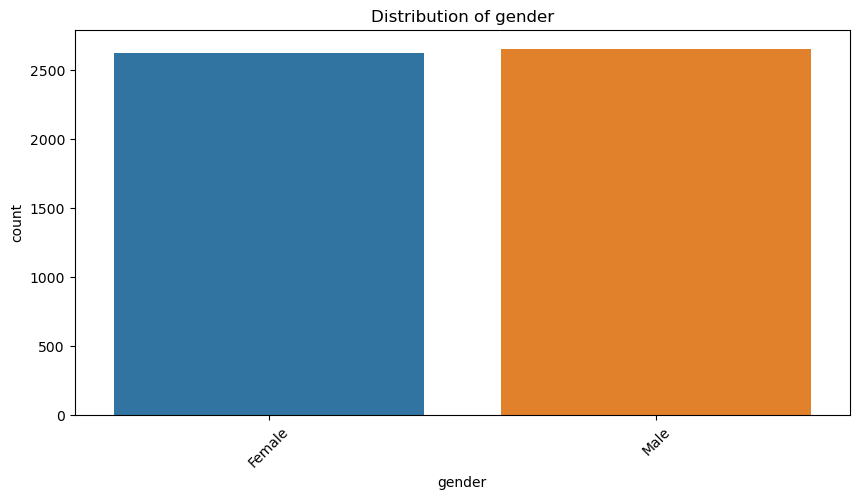

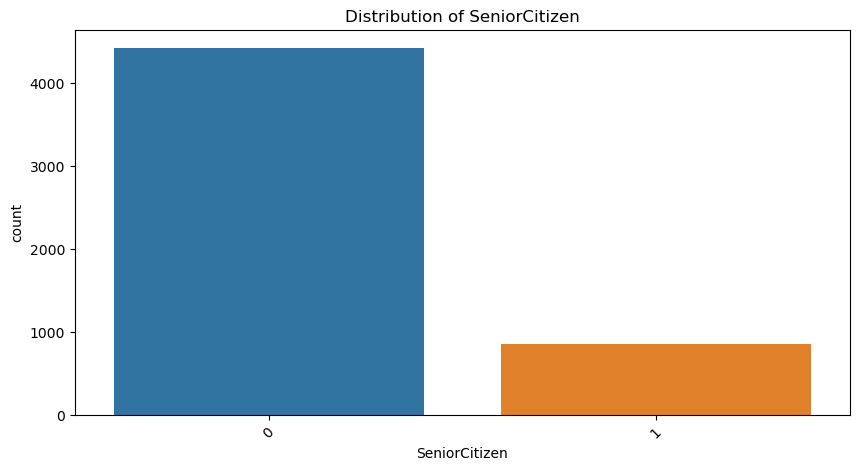

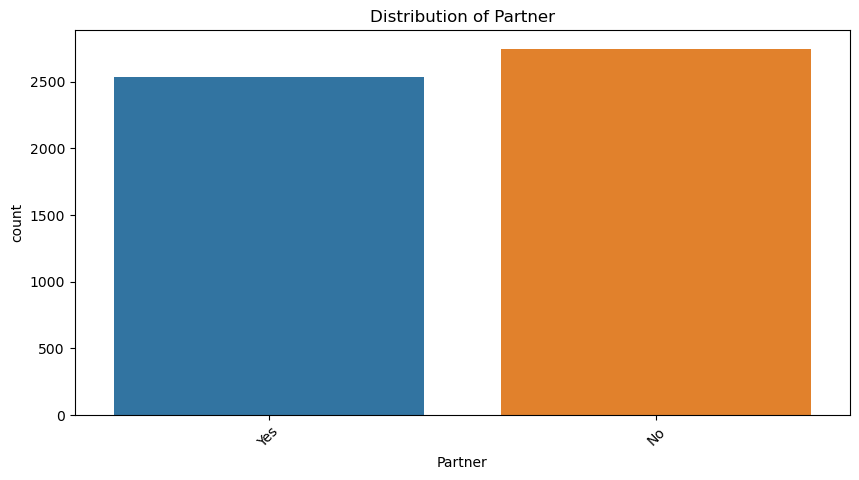

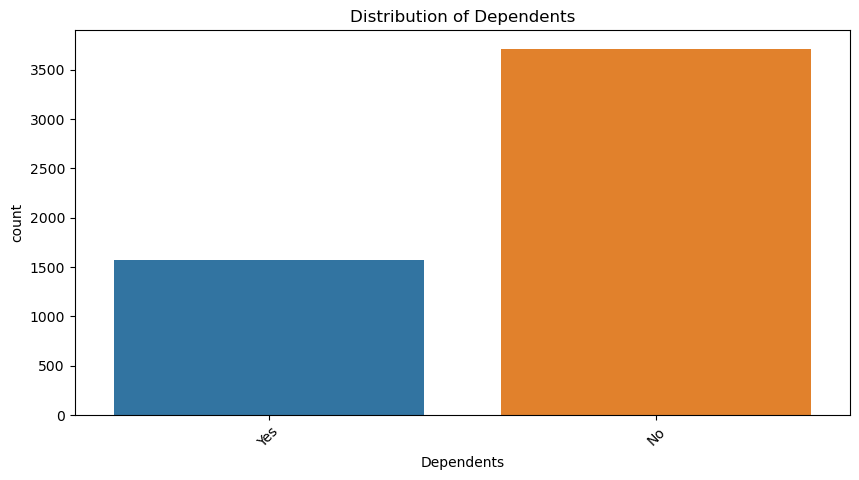

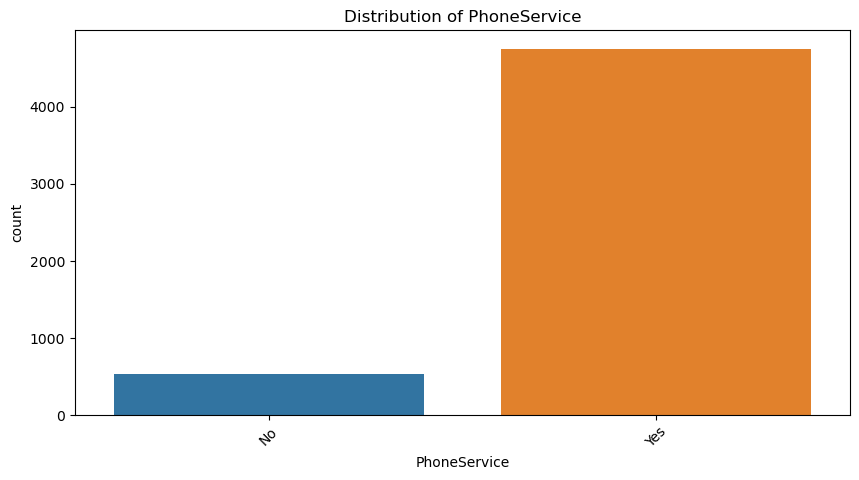

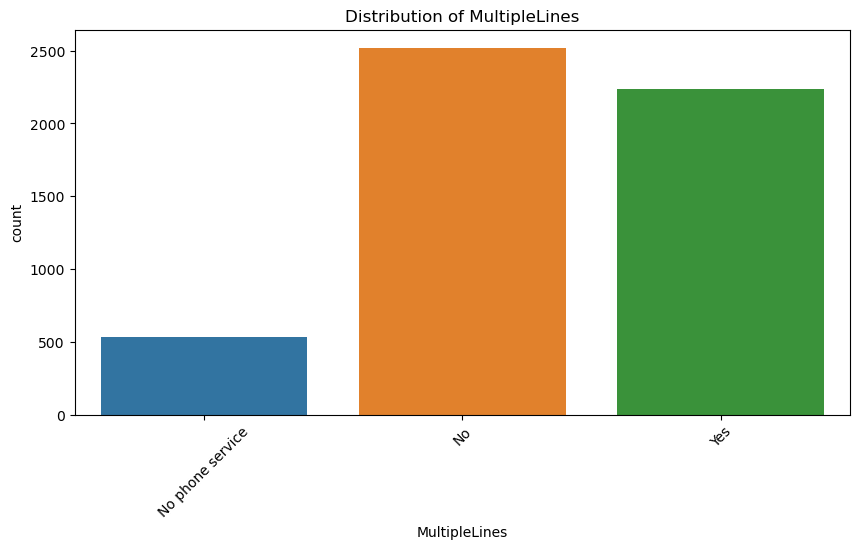

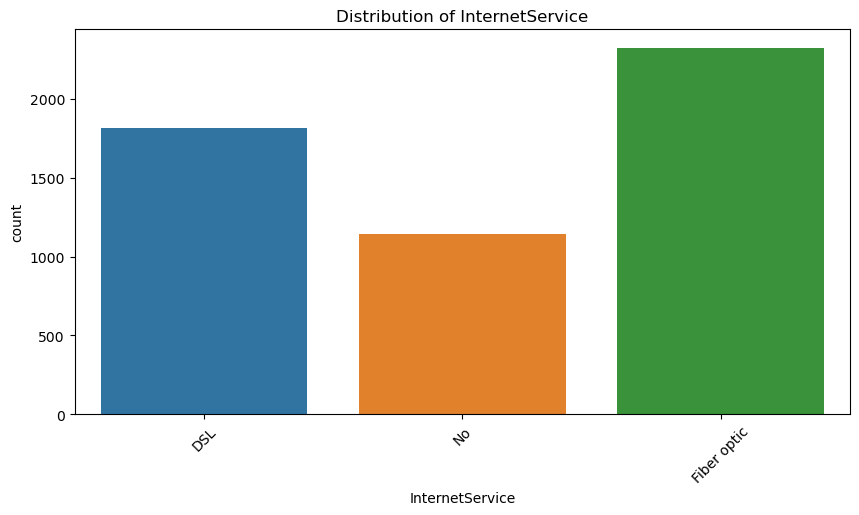

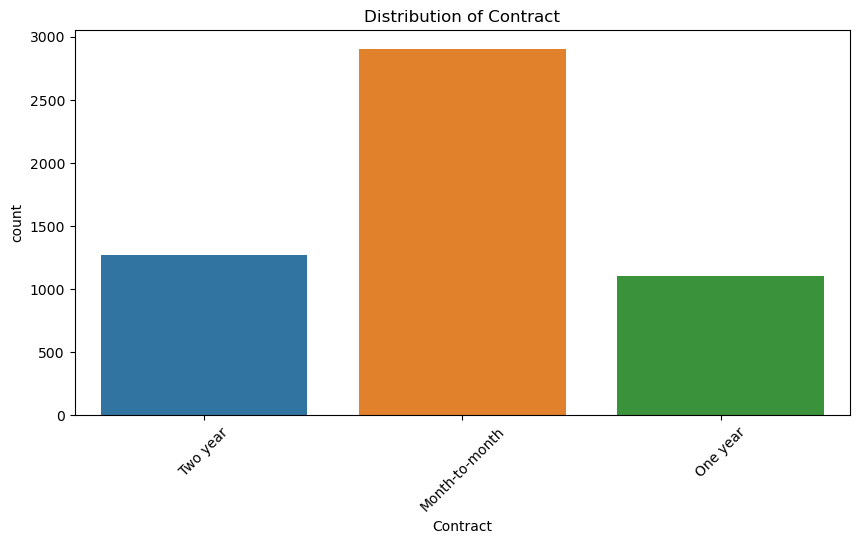

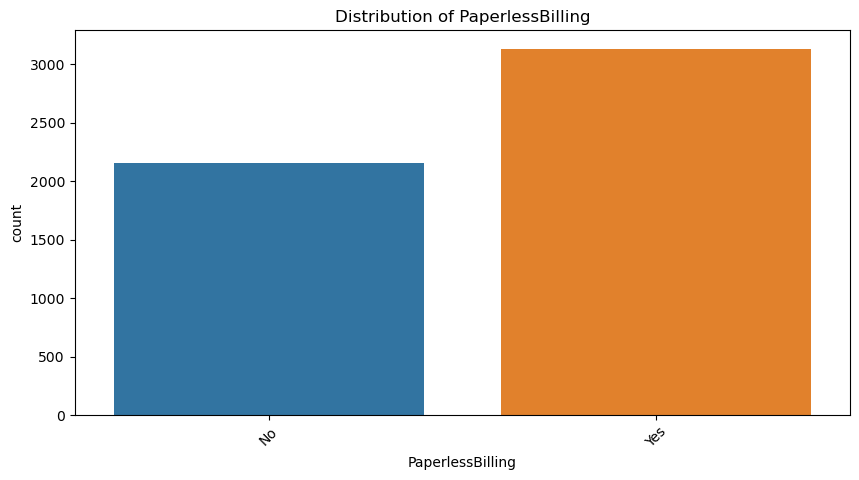

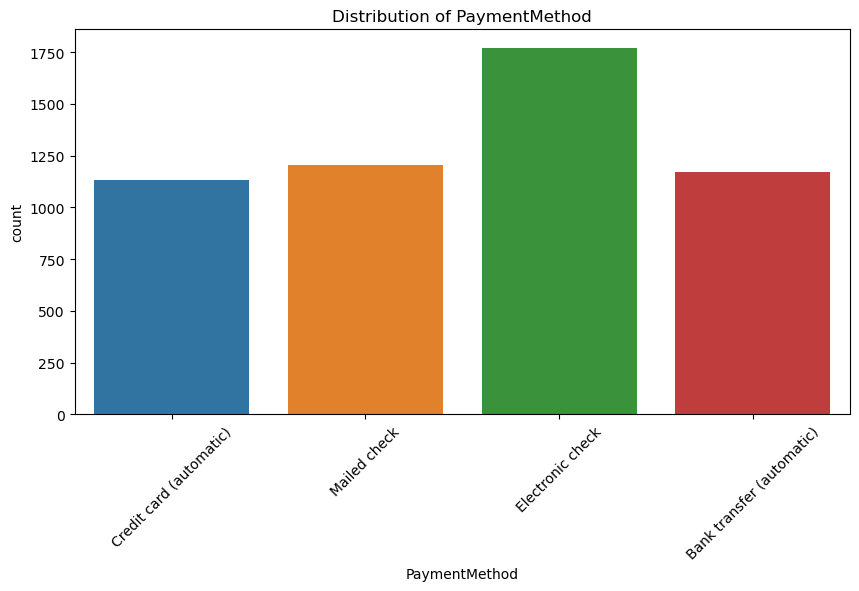

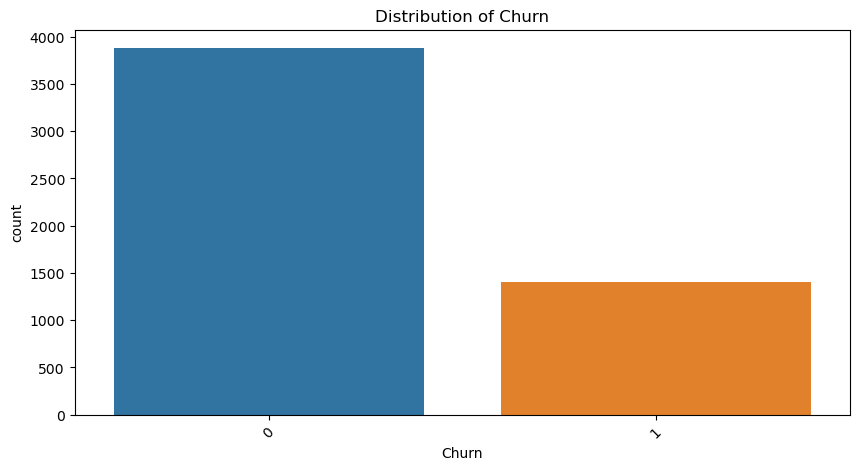

C:\Users\USER\AppData\Local\Temp\ipykernel_33720\4109185568.py:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')


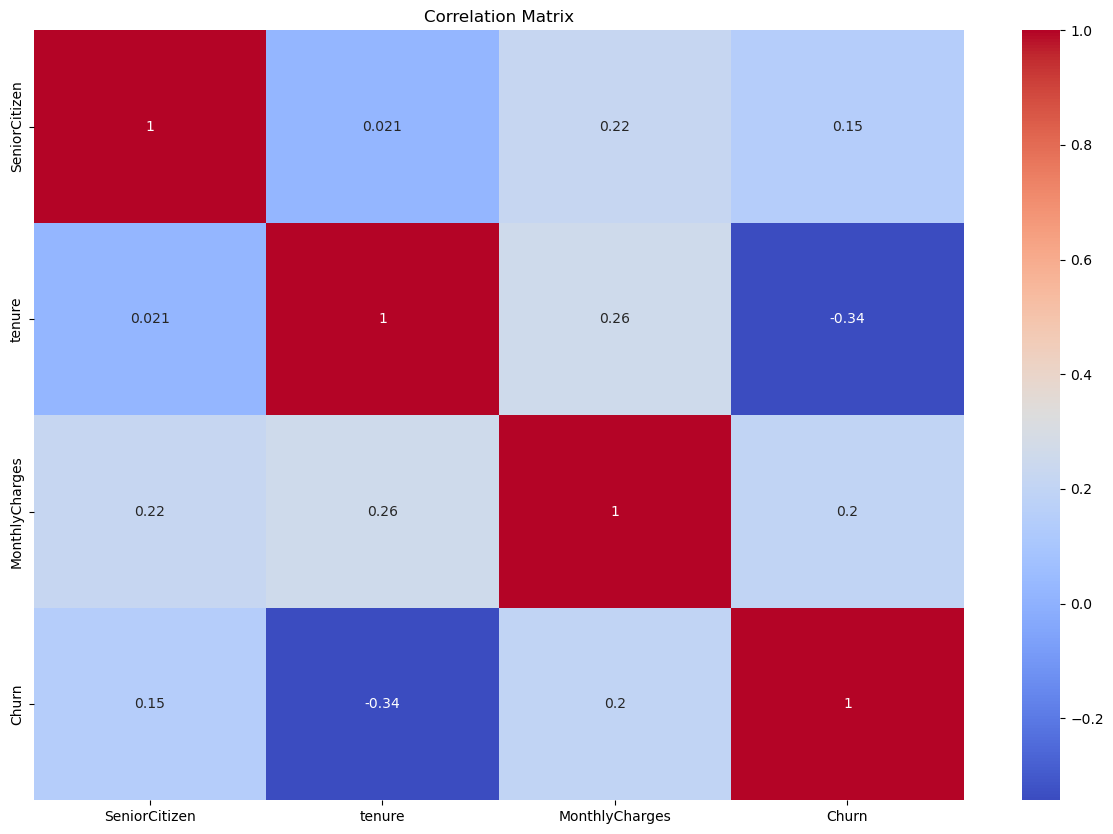

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Display the first few records
print("First few records:")
print(train_data.head())

# Display basic statistics
print("Basic statistics:")
print(train_data.describe())

# Check for missing values
print("Missing values:")
print(train_data.isnull().sum())

# Visualize the distribution of numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_data[column], bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

# Visualize the distribution of categorical columns
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_data, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Check the correlation between features and the target variable
plt.figure(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
